# 仿射

In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [77]:
image = cv2.imread("OpenCV_Logo.png")

In [78]:
rows, cols, ch = image.shape

In [79]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

In [80]:
def drawPoints(img,points,color):
    result = img.copy()
    for p in points:
        x,y = p
        result = cv2.circle(result,(x,y),10, color,-1)
    return result
    

In [81]:
img = np.zeros((rows,cols,3), np.uint8)

src = drawPoints(img,pts1,(0, 225, 225))
tra = drawPoints(img,pts2,(225, 0, 225))

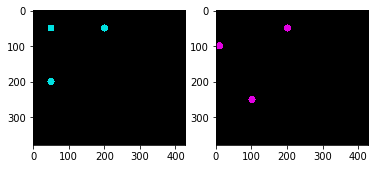

In [82]:
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(tra)
plt.show()

In [83]:
M = cv2.getAffineTransform(pts1,pts2)

In [84]:
M

array([[  1.26666667,   0.6       , -83.33333333],
       [ -0.33333333,   1.        ,  66.66666667]])

In [85]:
dst = cv2.warpAffine(image,M,(cols,rows))

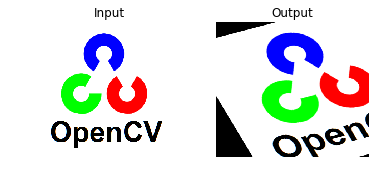

In [86]:
plt.subplot(121),plt.imshow(image),plt.title('Input'),plt.axis("off")
plt.subplot(122),plt.imshow(dst),plt.title('Output'),plt.axis("off")
plt.show()

---

# OpenCV绘画

https://docs.opencv.org/4.1.0/d6/d6e/group__imgproc__draw.html

## arrowedLine 箭头线段

§ arrowedLine()  	 
Python:  
img	=	cv.arrowedLine(	img, pt1, pt2, color[, thickness[, line_type[, shift[, tipLength]]]]	)  
  
Parameters
- img	Image.
- pt1	The point the arrow starts from.
- pt2	The point the arrow points to.
- color	Line color.
- thickness	Line thickness.
- line_type	Type of the line. See LineTypes
- shift	Number of fractional bits in the point coordinates.
- tipLength	The length of the arrow tip in relation to the arrow length



In [141]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [142]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [143]:
img = cv2.arrowedLine(img, (50,50), (100,100), (0,0,255),5,8,0,0.3)

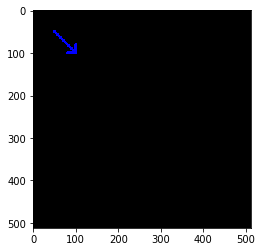

In [144]:
plt.imshow(img)

---

## circle 圆（点）

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [88]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

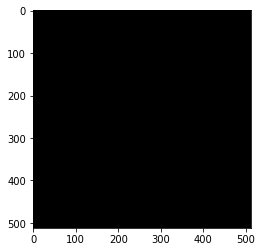

In [89]:
plt.imshow(img)

img	=	cv.circle(	img, center, radius, color[, thickness[, lineType[, shift]]]	)
https://docs.opencv.org/trunk/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670

In [90]:
img = cv2.circle(img,(50,50),20,(0,101,255),5)

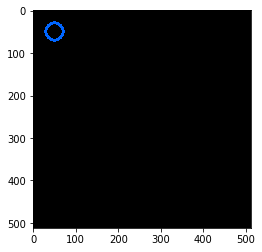

In [91]:
plt.imshow(img)

---

## clipLine 判断线条是否超出画框

clipLine()  
Python:  
retval, pt1, pt2	=	cv.clipLine(	imgRect, pt1, pt2	)  
  
Clips the line against the image rectangle.  
  
The function cv::clipLine calculates a part of the line segment that is entirely within the specified rectangle. it returns false if the line segment is completely outside the rectangle. Otherwise, it returns true .  
  
Parameters  
- imgSize	Image size. The image rectangle is Rect(0, 0, imgSize.width, - imgSize.height) .
- pt1	First line point.
- pt2	Second line point.

还有2重重载方式，详细请自行查看

In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [147]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [156]:
img = cv2.clipLine((0,0,512,512), (50,50), (100,100))

In [157]:
img

(True, (50, 50), (100, 100))

---

## drawContours 绘画轮廓

 drawContours()
 
 
 
 image	=	cv.drawContours(	image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]	)  
  
  
Parameters  
- image	Destination image.
- contours	All the input contours. Each contour is stored as a point vector.
- contourIdx	Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
- color	Color of the contours.
- thickness	Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
- lineType	Line connectivity. See LineTypes
- hierarchy	Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
- maxLevel	Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.
- offset	Optional contour shift parameter. Shift all the drawn contours by the specified 𝚘𝚏𝚏𝚜𝚎𝚝=(dx,dy) .


In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [97]:
# 创建画板
img = np.zeros((1000,1000,3), np.uint8)

In [99]:
points = np.array([[910, 641], [458, 485],[206, 632], [696, 488]])

In [100]:
points

array([[910, 641],
       [458, 485],
       [206, 632],
       [696, 488]])

In [101]:
[points.astype(int)]

[array([[910, 641],
        [458, 485],
        [206, 632],
        [696, 488]])]

In [102]:
img = cv2.drawContours(img, [points.astype(int)], 0, (100,100,100), 5)

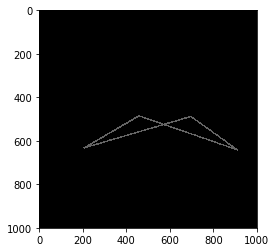

In [103]:
plt.imshow(img)

---

## drawMarker 点标记

drawMarker()  
  
Draws a marker on a predefined position in an image.  

The function cv::drawMarker draws a marker on a given position in the image. For the moment several marker types are supported, see MarkerTypes for more information.  
  
img	=	cv.drawMarker(	img, position, color[, markerType[, markerSize[, thickness[, line_type]]]]	)  

Parameters  
- img	Image.  
- position	The point where the crosshair is positioned.  
- color	Line color.  
- markerType	The specific type of marker you want to use, see MarkerTypes  
- thickness	Line thickness.   
- line_type	Type of the line, See LineTypes  
- markerSize	The length of the marker axis [default = 20 pixels]   

  
MarkerTypes  
enum cv::MarkerTypes  
#include <opencv2/imgproc.hpp>  
  
Possible set of marker types used for the cv::drawMarker function  
  
Enumerator  
MARKER_CROSS   
Python: cv.MARKER_CROSS  
A crosshair marker shape.  
  
MARKER_TILTED_CROSS   
Python: cv.MARKER_TILTED_CROSS  
A 45 degree tilted crosshair marker shape.  
  
MARKER_STAR   
Python: cv.MARKER_STAR  
A star marker shape, combination of cross and tilted cross.  
  
MARKER_DIAMOND   
Python: cv.MARKER_DIAMOND  
A diamond marker shape.  
  
MARKER_SQUARE   
Python: cv.MARKER_SQUARE  
A square marker shape.  

MARKER_TRIANGLE_UP   
Python: cv.MARKER_TRIANGLE_UP  
An upwards pointing triangle marker shape.  
  
MARKER_TRIANGLE_DOWN   
Python: cv.MARKER_TRIANGLE_DOWN  
A downwards pointing triangle marker shape.  

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [111]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [114]:
img = cv2.drawMarker(img, (300, 256), (0, 255, 255), markerType=cv2.MARKER_CROSS,markerSize=200,thickness=15)

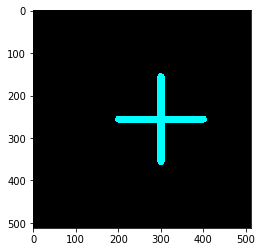

In [115]:
plt.imshow(img)

---

# ellipse() 椭圆

ellipse()   

Draws a simple or thick elliptic arc or fills an ellipse sector.  
  
The function cv::ellipse with more parameters draws an ellipse outline, a filled ellipse, an elliptic arc, or a filled ellipse sector. The drawing code uses general parametric form. A piecewise-linear curve is used to approximate the elliptic arc boundary. If you need more control of the ellipse rendering, you can retrieve the curve using ellipse2Poly and then render it with polylines or fill it with fillPoly. If you use the first variant of the function and want to draw the whole ellipse, not an arc, pass startAngle=0 and endAngle=360. If startAngle is greater than endAngle, they are swapped. The figure below explains the meaning of the parameters to draw the blue arc.  

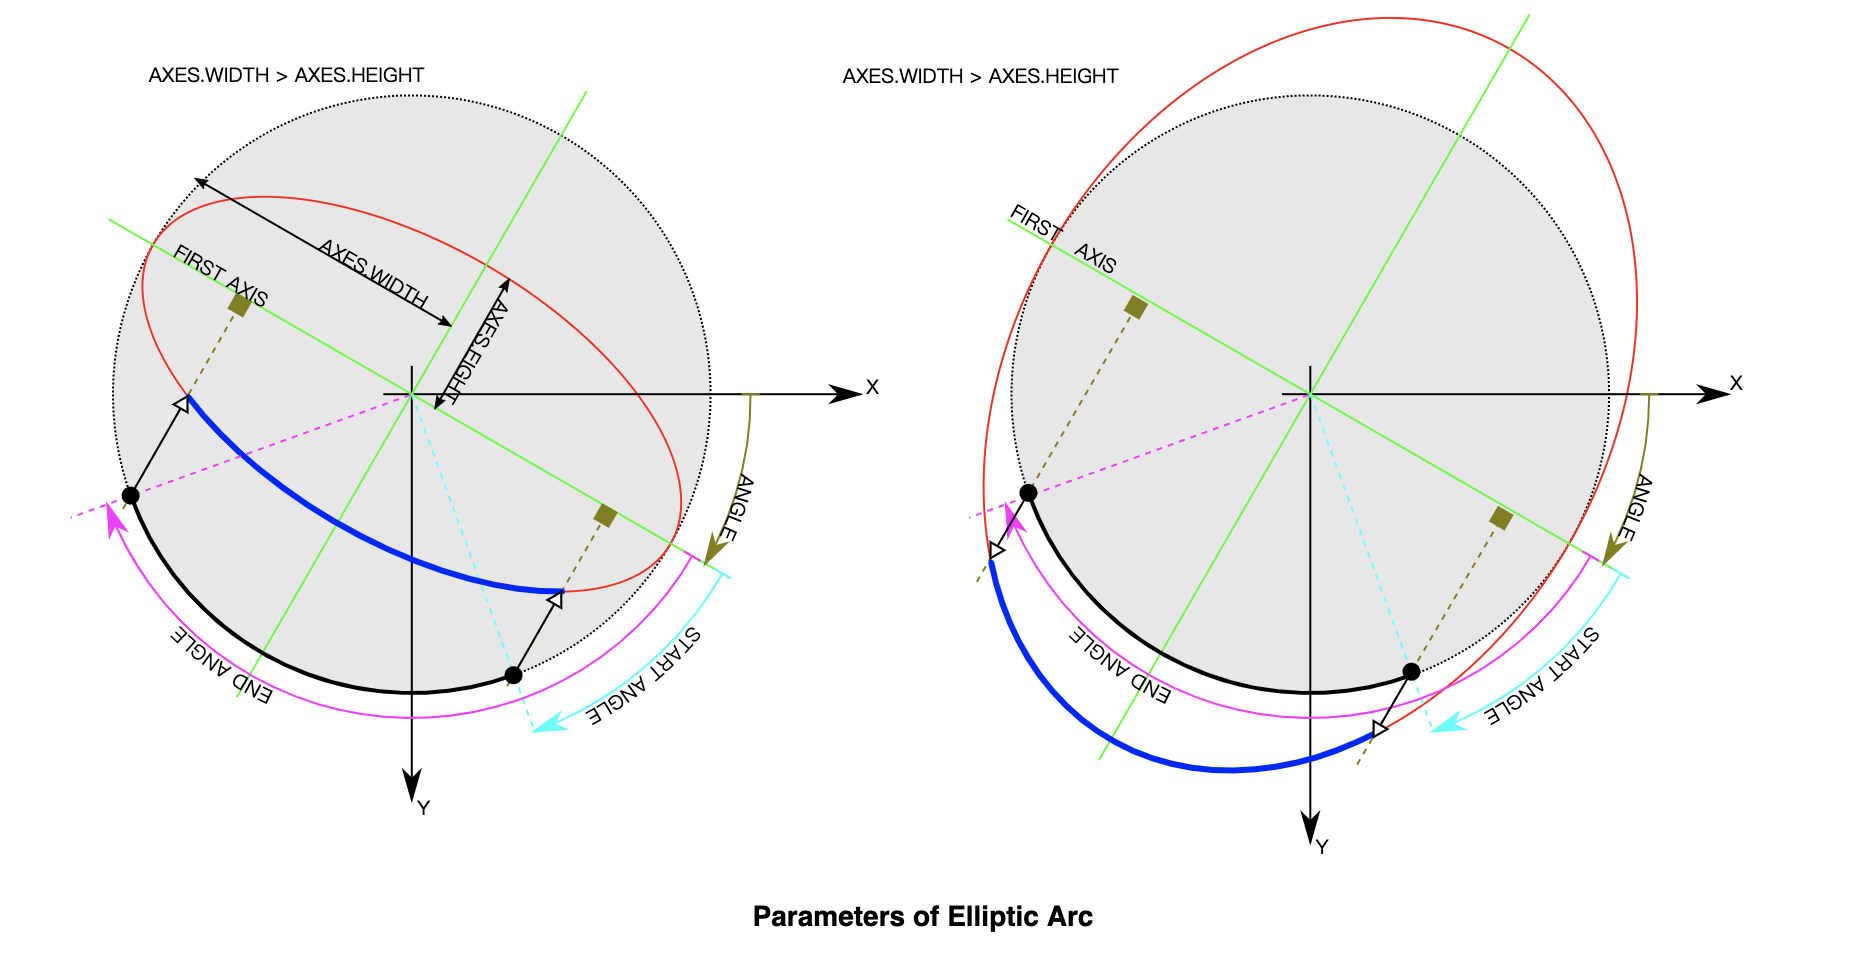

1/2  
img	=	cv.ellipse(	img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]	)  
img	=	cv.ellipse(	img, box, color[, thickness[, lineType]]	)  
  
Parameters  
- img	Image.  
- center	Center of the ellipse.  
- axes	Half of the size of the ellipse main axes.  
- angle	Ellipse rotation angle in degrees.  
- startAngle	Starting angle of the elliptic arc in degrees.  
- endAngle	Ending angle of the elliptic arc in degrees.  
- color	Ellipse color.  
- thickness	Thickness of the ellipse arc outline, if positive. Otherwise, this indicates that a filled ellipse sector is to be drawn.  
- lineType	Type of the ellipse boundary. See LineTypes  
- shift	Number of fractional bits in the coordinates of the center and values of axes.  

2/2  
img	=	cv.ellipse(	img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]	)  
img	=	cv.ellipse(	img, box, color[, thickness[, lineType]]	)  
  
Parameters  
- img	Image.  
- box	Alternative ellipse representation via RotatedRect. This means that the function draws an ellipse inscribed in the rotated rectangle.
- color	Ellipse color.  
- thickness	Thickness of the ellipse arc outline, if positive. Otherwise, this indicates that a filled ellipse sector is to be drawn.  
- lineType	Type of the ellipse boundary. See LineTypes  

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [16]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [142]:
#                 img   center     axes  angle 
#                                         startAngle
#                                              endAngle, color  thickness
img = cv2.ellipse(img, (256,256), (20,40), 35, 0, 360, (0,200,0), 50)

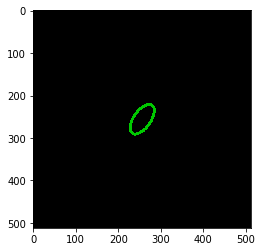

In [18]:
plt.imshow(img)

---

## elipse2Poly 椭圆转换成聚合点

ellipse2Poly() [1/2]  
  
pts	=	cv.ellipse2Poly(	center, axes, angle, arcStart, arcEnd, delta	)  
  

ellipse2Poly() [2/2]  
  
  
pts	=	cv.ellipse2Poly(	center, axes, angle, arcStart, arcEnd, delta	)  

Parameters  
- center	Center of the arc.  
- axes	Half of the size of the ellipse main axes. See ellipse for details.  
- angle	Rotation angle of the ellipse in degrees. See ellipse for details.  
- arcStart	Starting angle of the elliptic arc in degrees.  
- arcEnd	Ending angle of the elliptic arc in degrees.  
- delta	Angle between the subsequent polyline vertices. It defines the approximation accuracy.  
- pts	Output vector of polyline vertices.  

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pts = cv2.ellipse2Poly((256,256), (20,40), 35, 0, 360, 1)

In [5]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [6]:
src = drawPoints(img,pts,(0, 225, 225))

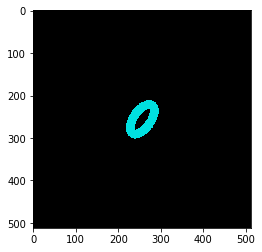

In [8]:
plt.imshow(src)

---

## fillConvexPoly 多边形填充（推荐）

fillConvexPoly() [1/2]  


Fills a convex polygon.

The function cv::fillConvexPoly draws a filled convex polygon. This function is much faster than the function fillPoly . It can fill not only convex polygons but any monotonic polygon without self-intersections, that is, a polygon whose contour intersects every horizontal line (scan line) twice at the most (though, its top-most and/or the bottom edge could be horizontal).
  
img	=	cv.fillConvexPoly(	img, points, color[, lineType[, shift]]	)  
  
  
fillConvexPoly() [2/2]  
  
img	=	cv.fillConvexPoly(	img, points, color[, lineType[, shift]]	)  
  
  
Parameters  
- img	Image.  
- points	Polygon vertices.  
- color	Polygon color.  
- lineType	Type of the polygon boundaries. See LineTypes  
- shift	Number of fractional bits in the vertex coordinates.  

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [38]:
# 创建画板
img = np.zeros((1000,1000,3), np.uint8)

In [39]:
points = np.array([[910, 641], [206, 632], [458, 485], [696, 488]])

In [40]:
img = cv2.fillConvexPoly(img, points, (100,100,100))

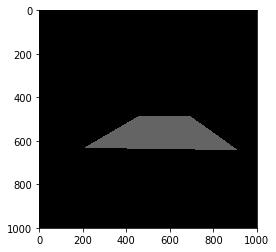

In [41]:
plt.imshow(img)

## fillPoly 多变形填充

## getFontScaleFromHeight 获取字体高度比例因子

In [9]:
import cv2

In [25]:
retval = cv2.getFontScaleFromHeight(cv2.FONT_HERSHEY_SIMPLEX,1,1)

In [26]:
retval

0.0

## getTextSize 获取文本的宽度和高度

In [ ]:
import cv2

In [28]:
retval, baseLine = cv2.getTextSize("hello", cv2.FONT_HERSHEY_SIMPLEX, 1, 1)

In [29]:
retval

(73, 22)

In [30]:
baseLine

10

## line 线段

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [65]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [68]:
img = cv2.line(img, (50,50), (100,100), (0,0,255),5)

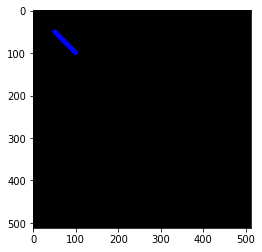

In [69]:
plt.imshow(img)

---

## polylines 绘制多边形

polylines() [1/2]  
  
img	=	cv.polylines(	img, pts, isClosed, color[, thickness[, lineType[, shift]]]	)  

polylines() [2/2]  
  
img	=	cv.polylines(	img, pts, isClosed, color[, thickness[, lineType[, shift]]]	)  
  
Parameters  
- img	Image.  
- pts	Array of polygonal curves.  
- isClosed	Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex.  
- color	Polyline color.  
- thickness	Thickness of the polyline edges.  
- lineType	Type of the line segments. See LineTypes  
- shift	Number of fractional bits in the vertex coordinates.  
  

In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [137]:
# 创建画板
img = np.zeros((1000,1000,3), np.uint8)

In [138]:
points = np.array([[910, 641], [206, 632], [458, 485], [696, 488]])
# points.dtype => 'int64'

In [139]:
src = drawPoints(img,points,(0, 225, 225))

In [140]:
img = cv2.polylines(img, np.int32([points]), 1, (255,255,255),5)

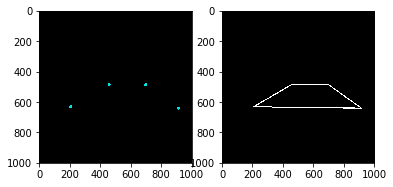

In [141]:
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(img)

---

## putText 叠加文字

putText()  

Draws a text string.  
  
The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered using the specified font are replaced by question marks. See getTextSize for a text rendering code example.  

img	=	cv.putText(	img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]	)  

Parameters  
- img	Image.  
- text	Text string to be drawn.  
- org	Bottom-left corner of the text string in the image.  
- fontFace	Font type, see HersheyFonts.  
- fontScale	Font scale factor that is multiplied by the font-specific base size.  
- color	Text color.  
- thickness	Thickness of the lines used to draw a text.  
- lineType	Line type. See LineTypes  
- bottomLeftOrigin	When true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.  



In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [16]:
#           需要写入text的图片
#                     text文本 ， 文本左下角在图片的坐标
#                                        字体          ，字体大小比例因子，颜色，线条厚度
img = cv2.putText(img, "Hello",(40,100), cv2.FONT_HERSHEY_SIMPLEX,2,(200,100,90),5)

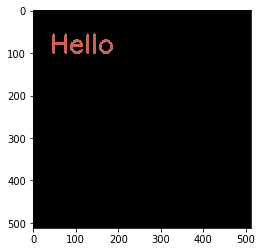

In [17]:
plt.imshow(img)

---

## rectangle 矩形

rectangle() [1/2]    
img	=	cv.rectangle(	img, pt1, pt2, color[, thickness[, lineType[, shift]]]	)  
img	=	cv.rectangle(	img, rec, color[, thickness[, lineType[, shift]]]	)  
  
  
Parameters  
- img	Image.  
- pt1	Vertex of the rectangle.  
- pt2	Vertex of the rectangle opposite to pt1 .  
- color	Rectangle color or brightness (grayscale image).  
- thickness	Thickness of lines that make up the rectangle. Negative values, like FILLED, mean that the function has to draw a filled rectangle.  
- lineType	Type of the line. See LineTypes  
- shift	Number of fractional bits in the point coordinates.  


  
§ rectangle() [2/2]  
img	=	cv.rectangle(	img, pt1, pt2, color[, thickness[, lineType[, shift]]]	)  
img	=	cv.rectangle(	img, rec, color[, thickness[, lineType[, shift]]]	)  


In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [33]:
# 创建画板
img = np.zeros((512,512,3), np.uint8)

In [34]:
img = cv2.rectangle(img, (50,50),(200,400),(100,100,100),5)

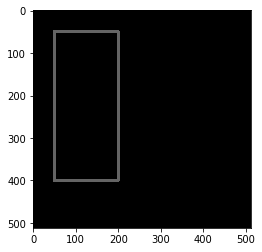

In [35]:
plt.imshow(img)

---